# Lab 02 - Feature Vectors and Language Models
In this lab we will continue working with words as features, but the focus will be to build language models.

First, let's make sure the libraries we'll be using are installed and initialized:

In [ ]:
%pip install numpy pandas nltk matplotlib
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



## Words as Feature Vectors
First, let's look at some text collections directly available in [NLTK](https://www.nltk.org).

To explore all the available Corpora in NLTK we just need to run a command and list the available resources, after we have downloaded them. The documentation on NLTK's [website](https://www.nltk.org/book/ch02.html) will give you more details on each Corpus.

There are many interesting collections such as: the Gutenberg collection of books, the  Brown collection of news, novels and other stories, and the USA presidential inaugural speeches.

Let's start by downloading the resources. NLTK's `download()` command will launch a GUI, or a CLI to let you select the data you want to install.

**Use it to download the `inaugural` Corpus.**

In [ ]:
import nltk

nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> inaugural


      Package inaugural is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

Now we should be able to list the downloaded resources as well.

In [ ]:
import os
# listdir- returns a list containing the names of the entries in the directory given by path
print(os.listdir(nltk.data.find("corpora")))

['inaugural', 'inaugural.zip']


So to start with, let's experiment with the USA Presidential inaugural speeches.

In [ ]:
from nltk.corpus import inaugural
#fileids – A list of the files that make up this corpus
print(inaugural.fileids())

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Reaga

Lets print Trumps's one!

In [ ]:
# doc = "2017-Trump.txt"
# print(inaugural.raw(doc))

doc = "2017-Trump.txt"
print(inaugural.raw(doc))

Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow Americans, and people of the world: Thank you.

We, the citizens of America, are now joined in a great national effort to rebuild our country and restore its promise for all of our people. Together, we will determine the course of America and the world for many, many years to come. We will face challenges, we will confront hardships, but we will get the job done.

Every 4 years, we gather on these steps to carry out the orderly and peaceful transfer of power, and we are grateful to President Obama and First Lady Michelle Obama for their gracious aid throughout this transition. They have been magnificent. Thank you.

Today's ceremony, however, has very special meaning. Because today we are not merely transferring power from one administration to another or from one party to another, but we are transferring power from Washington, DC, and giving it back to you, the people.

For too long, a 

NLTK corpora gives us all the words and sentences as well as other statistics out of the box.

In [ ]:
print(len(inaugural.words(doc)))

1693


In [ ]:
#download the punkt is a sentence tokenizer
nltk.download("punkt")
#We can see its tokenized into sentences here
print(inaugural.sents(doc))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[['Chief', 'Justice', 'Roberts', ',', 'President', 'Carter', ',', 'President', 'Clinton', ',', 'President', 'Bush', ',', 'President', 'Obama', ',', 'fellow', 'Americans', ',', 'and', 'people', 'of', 'the', 'world', ':', 'Thank', 'you', '.'], ['We', ',', 'the', 'citizens', 'of', 'America', ',', 'are', 'now', 'joined', 'in', 'a', 'great', 'national', 'effort', 'to', 'rebuild', 'our', 'country', 'and', 'restore', 'its', 'promise', 'for', 'all', 'of', 'our', 'people', '.'], ...]


## Challenge 01
Given this incomplete function, write the necessary `TODO X` code to let the function return the total number of words and the total number of distinct words, for a given document name in that corpus.

In [ ]:
def calculate_inaugural_stats(doc):
    # TODO 1 - Get the pre-tokenised list of words from the inaugural corpus
    doc_words = inaugural.words(doc)

    # TODO 2 - Calculate the total number of words
    num_words = len(doc_words)

    # TODO 3 - Calculate the total number of distinct words (vocabulary)
    vocab = len(set(doc_words))

    return num_words, vocab

Now let's test it!

In [ ]:
def print_inaugural_stats(speech_name):
    tokens, vocab = calculate_inaugural_stats(speech_name)
    print(f"Num words in {speech_name}: {tokens}")
    print(f"Vocabulary size: {vocab}")

print_inaugural_stats("2017-Trump.txt")

Num words in 2017-Trump.txt: 1693
Vocabulary size: 582


Let's compare Trump's speech against Obama's inaugural speech...

In [ ]:
print_inaugural_stats("2009-Obama.txt")

Num words in 2009-Obama.txt: 2726
Vocabulary size: 938


## Challenge 02
Complete the missing code (`TODO X`) in the function to calculate the average word length (i.e. number of characters per word) of a given document.

In [ ]:
def calculate_inaugural_word_stats(doc):
    doc_words = inaugural.words(doc)

    # TODO 1 - Construct a list that contains the word lengths for each DISTINCT word in the document
    vocab_lengths = [len(word) for word in set(doc_words)]

    # TODO 2 - Find the average word type length
    avg_vocab_length = sum(vocab_lengths) / len(vocab_lengths)

    return avg_vocab_length

Let's try it!

In [ ]:
speech_name = "2017-Trump.txt"
avg_length = calculate_inaugural_word_stats(speech_name)
print(f"Average word length for {speech_name}: {avg_length:.2f} characters long")

Average word length for 2017-Trump.txt: 5.86 characters long


Now it will be interesting to look at the word distribution and see how the last two USA Presidents compare. NLTK again has a nice class with functions for that, `FreqDist`!

In [ ]:
from nltk import FreqDist

obama_words = inaugural.words("2009-Obama.txt")
trump_words = inaugural.words("2017-Trump.txt")

# Construct a frequency distribution over the lowercased words in the document
fd_obama = FreqDist(w.lower() for w in obama_words)
# Find the top 50 most frequently used words in the speech
print("\nOBAMA\n", fd_obama.most_common(50))

# Construct a frequency distribution over the lowercased words in the document
fd_trump = FreqDist(w.lower() for w in trump_words)
# Find the top 50 most frequently used words in the speech
print("\nTRUMP\n", fd_trump.most_common(50))


OBAMA
 [('the', 135), (',', 130), ('and', 111), ('.', 108), ('of', 82), ('to', 70), ('our', 67), ('we', 62), ('that', 49), ('a', 47), ('is', 36), ('in', 25), ('this', 24), ('us', 23), ('for', 23), ('are', 22), (';', 22), ('--', 22), ('but', 20), ('it', 19), ('will', 19), ('on', 17), ('they', 17), ('have', 16), ('not', 16), ('you', 14), ('has', 14), ('who', 14), ('with', 13), ("'", 13), ('can', 13), ('nation', 12), ('be', 12), ('s', 12), ('as', 11), ('or', 11), ('those', 11), ('new', 11), ('america', 10), ('their', 10), ('-', 9), ('so', 9), ('these', 9), ('all', 9), ('by', 8), ('been', 8), ('every', 8), ('at', 8), ('because', 8), ('must', 8)]

TRUMP
 [(',', 106), ('.', 89), ('and', 76), ('the', 71), ('we', 50), ('of', 48), ('our', 48), ('will', 43), ('to', 37), ('america', 20), ('is', 20), ('a', 15), ('for', 15), ('you', 14), ('in', 14), ('all', 14), ('are', 13), ('but', 13), ('be', 13), ('their', 11), ('this', 11), ("'", 11), ('from', 11), ('it', 11), ('your', 11), ('american', 11), (

As you might have expected... popular words in Trump's speech are: `will`, `america`, `american`, `people`, `country`, `again`... :-)

Now let's plot the distributions!

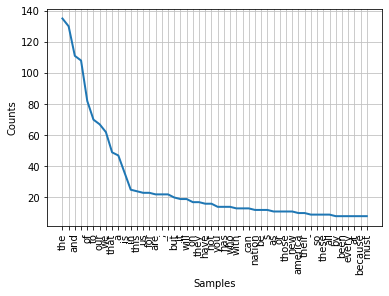

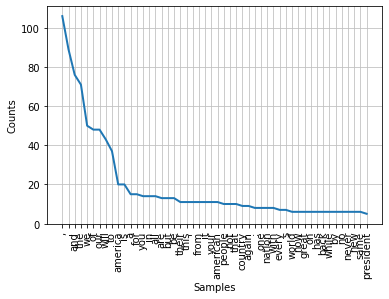

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [ ]:
fd_obama.plot(50)
fd_trump.plot(50)

Those distributions are "normal" and most documents or corpora will follow a very similar curve.

Let's compare some word frequencies now between the two Presidents

In [ ]:
print(f"Obama -> peace: {fd_obama['peace']} - america: {fd_obama['america']}")
print(f"Trump -> peace: {fd_trump['peace']} - america: {fd_trump['america']}")

Obama -> peace: 4 - america: 10
Trump -> peace: 0 - america: 20


## Challenge 03
Let's try to build a similar function that calculates the top most frequent words in a document, but using the `Counter` class that we used in the previous lab. Complete the `TODO X` sections.

In [ ]:
doc_words[:10]

['Chief',
 'Justice',
 'Roberts',
 ',',
 'President',
 'Carter',
 ',',
 'President',
 'Clinton',
 ',']

In [ ]:
doc_words = inaugural.words(doc)
print(doc_words)

['Chief', 'Justice', 'Roberts', ',', 'President', ...]


In [ ]:
# set_ = set(doc_words)
print(len(set(doc_words)))

TypeError: ignored

In [ ]:
from collections import Counter

# Use a string as an argument
Counter([word.lower() for word in doc_words])

In [ ]:
from collections import Counter

def get_top_freq(doc, k=50):
    doc_words = inaugural.words(doc)
    
    # TODO 1 - Construct a frequency distribution over the words in the document, ensuring all words are lowercase
    fd_doc_words = Counter([word.lower() for word in doc_words])
    
    # TODO 2 - Find the top x most frequently used words in the document
    top_words = fd_doc_words.most_common(k)

    return top_words

Now let's test it!

In [ ]:
print(f"Top 50 words for Trump's 2017 speech:\n{get_top_freq('2017-Trump.txt')}")

Top 50 words for Trump's 2017 speech:
[(',', 106), ('.', 89), ('and', 76), ('the', 71), ('we', 50), ('of', 48), ('our', 48), ('will', 43), ('to', 37), ('america', 20), ('is', 20), ('a', 15), ('for', 15), ('you', 14), ('in', 14), ('all', 14), ('are', 13), ('but', 13), ('be', 13), ('their', 11), ('this', 11), ("'", 11), ('from', 11), ('it', 11), ('your', 11), ('american', 11), ('people', 10), ('not', 10), ('that', 10), ('country', 9), ('again', 9), (':', 8), ('one', 8), ('nation', 8), ('with', 8), ('every', 7), ('s', 7), ('world', 6), ('now', 6), ('great', 6), ('on', 6), ('has', 6), ('back', 6), ('while', 6), ('by', 6), ('no', 6), ('never', 6), ('new', 6), ('same', 6), ('president', 5)]


## Challenge 04
Now let's try to build a TFIDF feature vector!

The first thing is to calculate the Term Frequency (TF).

There are different ways to calculate the Term Frequency. Try to implement the formula $tf_{t,d}=\frac{count(t,d)}{count(d)}$ that we used before in the lecture. Complete the `TODO X` section.

In [ ]:
def calculate_tf(token_count, bow):
    tf = {} #creates an empty dictionary where key,value pair is stored
    num_bow = len(bow)

    for token, count in token_count.items():
        # TODO - Calculate the term frequency using the formula:
        # "count of term in the document" / "total number of words in the document"
        tf[token] = count / float(num_bow)

    return tf

Let's try it!

In [ ]:
tokens_01 = inaugural.words("2017-Trump.txt")
tokens_02 = inaugural.words("2009-Obama.txt")
vocab = set(tokens_01).union(set(tokens_02))

def _get_tf(tokens, vocab):
    token_count = dict.fromkeys(vocab, 0)
    for token in tokens:
        token_count[token] += 1
    return calculate_tf(token_count, tokens)

tf_01 = _get_tf(tokens_01, vocab)
tf_02 = _get_tf(tokens_02, vocab)


In [ ]:
tf_01

{'would': 0.0,
 '!': 0.0,
 'back': 0.0035440047253396337,
 'rule': 0.0,
 'band': 0.0,
 'scale': 0.0,
 'without': 0.0,
 'my': 0.0005906674542232723,
 'become': 0.0005906674542232723,
 'still': 0.0,
 'decay': 0.0005906674542232723,
 'unpleasant': 0.0,
 'dignified': 0.0,
 'watching': 0.0005906674542232723,
 'Do': 0.0005906674542232723,
 'strengthen': 0.0,
 'already': 0.0,
 'rich': 0.0005906674542232723,
 'sum': 0.0,
 'bleed': 0.0005906674542232723,
 'Nation': 0.0035440047253396337,
 'noble': 0.0,
 'specter': 0.0,
 'for': 0.00767867690490254,
 'Government': 0.0017720023626698169,
 'reminded': 0.0,
 'instruments': 0.0,
 'skill': 0.0,
 'prudent': 0.0,
 'remembered': 0.0005906674542232723,
 'winds': 0.0,
 'alarmed': 0.0,
 'decree': 0.0005906674542232723,
 'dust': 0.0,
 'return': 0.0,
 'peoples': 0.0,
 'legacy': 0.0,
 'Together': 0.0011813349084465446,
 'shores': 0.0005906674542232723,
 'cost': 0.0005906674542232723,
 'decisions': 0.0,
 'ideals': 0.0,
 'immigration': 0.0005906674542232723,
 'c

## Challenge 05
Now that we have our term frequency, let's calculate the Inverse Term Frequency (IDF) for a list of documents.

We are going to use the original formula here: $\log{\frac{N}{n_t}}$, where $N$ is the number of documents and $n_t$ is the number of documents that contain the term $t$. Complete the `TODO X` sections.

In [ ]:
import math

def calculate_idf(docs):
    N = len(docs)
    
    # TODO 1 - Initialise a new dictionary with the keys from the documents and the values set to 0
    idf = dict.fromkeys(docs[0].keys(), 0)
    for doc in docs:
        for word, val in doc.items():
            if val > 0:
                # TODO 2 - Increase the idf dictionary counter by one
                idf[word] +=1
    
    for word, val in idf.items():
        idf[word] = math.log(N / float(val))

    return idf

Now let's collect all the IDFs.

In [ ]:
tfs = [tf_01, tf_02]
idfs = calculate_idf(tfs)

In [ ]:
idfs['help']

0.6931471805599453

In [ ]:
tf_02['help']

0.00036683785766691124

## Challenge 06
And finally... the TFIDF calculation.

Calculate the TFIDF for all the documents. Complete the `TODO X` section.

In [ ]:
#The TF-IDF score of a term in a document is calculated as the 
#product of its term frequency (TF) and inverse document frequency (IDF).
def calculate_tfidf(tfs, idfs):
    tfidf = {}

    for word, val in tfs.items():
        # TODO - Calculate and store the tfidf
        tfidf[word] = val * idfs[word]

    return tfidf

Let's test test the TFIDFs!

In [ ]:
tfidf_01 = calculate_tfidf(tf_01, idfs)
tfidf_02 = calculate_tfidf(tf_02, idfs)
print(f"Trump: {tfidf_01}")
print(f"\nObama: {tfidf_02}")

Trump: {'would': 0.0, '!': 0.0, 'back': 0.0, 'rule': 0.0, 'band': 0.0, 'scale': 0.0, 'without': 0.0, 'my': 0.0, 'become': 0.00040941948054338173, 'still': 0.0, 'decay': 0.00040941948054338173, 'unpleasant': 0.0, 'dignified': 0.0, 'watching': 0.0, 'Do': 0.00040941948054338173, 'strengthen': 0.0, 'already': 0.0, 'rich': 0.00040941948054338173, 'sum': 0.0, 'bleed': 0.00040941948054338173, 'Nation': 0.0024565168832602906, 'noble': 0.0, 'specter': 0.0, 'for': 0.0, 'Government': 0.0012282584416301453, 'reminded': 0.0, 'instruments': 0.0, 'skill': 0.0, 'prudent': 0.0, 'remembered': 0.00040941948054338173, 'winds': 0.0, 'alarmed': 0.0, 'decree': 0.00040941948054338173, 'dust': 0.0, 'return': 0.0, 'peoples': 0.0, 'legacy': 0.0, 'Together': 0.0008188389610867635, 'shores': 0.0, 'cost': 0.0, 'decisions': 0.0, 'ideals': 0.0, 'immigration': 0.00040941948054338173, 'cars': 0.0, 'them': 0.0, 'intend': 0.0, 'night': 0.00040941948054338173, 'decision': 0.00040941948054338173, 'hear': 0.0004094194805433

## Challenge 07
Let's try it and then visualise it as a DataFrame!

Try to fit the two dictionaries into a single DataFrame so that we can visualise it better. Complete the `TODO X` section.

In [ ]:
import pandas as pd

# TODO
df = pd.DataFrame([tfidf_01, tfidf_02])
df

,would,!,back,rule,band,scale,without,my,become,still,...,minds,consume,old,drafted,weakness,benefit,destroy,endure,middle,large
0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000409,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000409,0.000000,0.000000,0.000409,0.000409
1,0.000254,0.000254,0.0,0.000254,0.000254,0.000254,0.000509,0.0,0.000000,0.000509,...,0.0,0.000254,0.0,0.000254,0.000254,0.000000,0.000254,0.000254,0.000000,0.000000


Now we have TFIDF feature vectors!

# Language Model Experiments
Let's play with some popular n-gram language models. We are going to use NLTK again for that and try to predict the sequence of words.

First, let's import some libraries.

In [ ]:
from nltk.corpus import gutenberg
from nltk.lm import WittenBellInterpolated, MLE, Laplace
from nltk.util import ngrams, pad_sequence, everygrams

Next we will build a function that performs the prediction based on MLE( Maximum Likelihood Estimation)

In [ ]:
def build_mle_estimator(doc_name, n):
    # Construct a list of lowercase words from the document
    words = [w.lower() for w in inaugural.words(doc_name)]
    
    # generate ngrams
    ngrams = list(everygrams(words, max_len=n))

    # build ngram language models
    lm = MLE(n)
    #The fit function below is used to fit an n-gram language model to the given text corpus.
    #The fit function takes two arguments:
    #ngrams: A list of n-grams (tuples of words) to use for training the language model.
    #vocabulary_text: A list of words that represents the vocabulary of the language model.
    lm.fit([ngrams], vocabulary_text=words)
    print(lm.vocab)
    
    return lm

Build the estimator first.

In [ ]:
lm = build_mle_estimator("2017-Trump.txt", 2)

<Vocabulary with cutoff=1 unk_label='<UNK>' and 548 items>


Now let's try it!

In [ ]:
def print_lm_scores(lm):
    print(f"Probability of 'first' followed by 'america': {lm.score(word='america', context=['first']):.5f}")
    print(f"Probability of 'america' followed by 'first': {lm.score(word='first', context=['america']):.5f}")

    print(f"Probability of 'you' followed by 'thank': {lm.score(word='thank', context=['you']):.5f}")
    print(f"Probability of 'thank' followed by 'you': {lm.score(word='you', context=['thank']):.5f}")

print_lm_scores(lm)

Probability of 'first' followed by 'america': 0.00000
Probability of 'america' followed by 'first': 0.10000
Probability of 'you' followed by 'thank': 0.00000
Probability of 'thank' followed by 'you': 1.00000


## Challenge 08
Try an add-one Laplace smoothing model instead.

In [ ]:
def build_laplace_estimator(doc_name, n):
    # TODO - Implement a function simlar to `build_mle_estimator` that instead uses an add-one Laplace smoothing model.
    # Hint: you might want to check the NLTK documentation (https://www.nltk.org/api/nltk.lm.html) on that!
    words = [w.lower() for w in inaugural.words(doc_name)]

    ngrams = list(everygrams(words, max_len=n))

    lm = Laplace(n)
    lm.fit([ngrams], vocabulary_text=words)
    print(lm.vocab)

    return lm

Build this estimator as well.

In [ ]:
lm2 = build_laplace_estimator('2017-Trump.txt', 2)

<Vocabulary with cutoff=1 unk_label='<UNK>' and 548 items>


Now test it and observe any differences in the results.

In [ ]:
print_lm_scores(lm2)

Probability of 'first' followed by 'america': 0.00181
Probability of 'america' followed by 'first': 0.00528
Probability of 'you' followed by 'thank': 0.00178
Probability of 'thank' followed by 'you': 0.00906
